In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import api_utils
import app_utils

In [2]:
# setup payload
payload = {'straight': {
                'df': [],
                'runIds': [57, 58, 59],
                'x': 'Time (s)', 
                'y': 'Distance Traveled (m)' ,
                'titles': ['0.25 (m/s) Command for 2 s', '0.5 (m/s) Command for 2 s', '1.0 (m/s) Command for 1 s']
                }, 
            'turn': {
                'df': [],
                'runIds': [60, 61, 62],
                'x': 'Time (s)',
                'y': 'Angle (rads)',
                'titles': ['$\pi/8$ (rad/s) for 2 seconds', '$\pi/2$ (rad/s) for 2 seconds', '$\pi$ (rad/s) for 2 seconds']
                },
            'square': {
                'df': [],
                'runIds': [64],
                'x': 'Time (s)',
                'y': 'Angle (rad)',
                'titles': ['Drive Squre four times']
                }
            }
payload

{'straight': {'df': [],
  'runIds': [57, 58, 59],
  'x': 'Time (s)',
  'y': 'Distance Traveled (m)',
  'titles': ['0.25 (m/s) Command for 2 s',
   '0.5 (m/s) Command for 2 s',
   '1.0 (m/s) Command for 1 s']},
 'turn': {'df': [],
  'runIds': [60, 61, 62],
  'x': 'Time (s)',
  'y': 'Angle (rads)',
  'titles': ['$\\pi/8$ (rad/s) for 2 seconds',
   '$\\pi/2$ (rad/s) for 2 seconds',
   '$\\pi$ (rad/s) for 2 seconds']},
 'square': {'df': [],
  'runIds': [64],
  'x': 'Time (s)',
  'y': 'Angle (rad)',
  'titles': ['Drive Squre four times']}}

In [3]:
# get all data from the db
for straightRunId, turnRundId in zip(payload['straight']['runIds'], payload['turn']['runIds']):
    # append straight runs
    payload['straight']['df'].append(api_utils.get_df(straightRunId))
    # append turn runs
    payload['turn']['df'].append(api_utils.get_df(turnRundId))

# append turn
payload['square']['df'].append(api_utils.get_df(payload['square']['runIds'][0]))

In [4]:
# example of how to see data
payload['square']['df'][0].keys()

dict_keys(['MBOT_IMU', 'MBOT_ENCODERS', 'ODOMETRY', 'MBOT_STATE', 'MBOT_SETPOINTS', 'SLAM_POSE', 'CONTROLLER_PATH', 'MBOT_MOTOR_COMMAND'])

In [5]:
payload['square']['df'][0]['MBOT_MOTOR_COMMAND'].keys()

dict_keys(['timestamp', 'utime', 'trans_v', 'angular_v'])

In [6]:
# set plot info for driving straight
plotInfo1 = []
# row 1
plotInfo1 = app_utils.define_plot(plotInfo1, 'ODOMETRY', 'x', 0, 'm')

# row 2
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_SETPOINTS', 'right_velocity', 1, 'm/s')
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_STATE', 'right_velocity', 1, 'm/s')

# row 3
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_SETPOINTS', 'left_velocity', 2, 'm/s')
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_STATE', 'left_velocity', 2, 'm/s')
plotInfo1

[{'channel': 'ODOMETRY', 'value': 'x', 'row': 0, 'ylabel': 'm'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': 'm/s'},
 {'channel': 'MBOT_STATE',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': 'm/s'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': 'm/s'},
 {'channel': 'MBOT_STATE',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': 'm/s'}]

In [7]:
# set plot info for turning
plotInfo2 = []

# row 1
plotInfo2 = app_utils.define_plot(plotInfo2, 'ODOMETRY', 'theta', 0, '(m)')

# row 2
# set points
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_SETPOINTS', 'right_velocity', 1, '(m/s)')
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_STATE', 'right_velocity', 1, '(m/s)')

# row 3
# setpoints
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_SETPOINTS', 'left_velocity', 2, '(m/s)')
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_STATE', 'left_velocity', 2, '(m/s)')
plotInfo2

[{'channel': 'ODOMETRY', 'value': 'theta', 'row': 0, 'ylabel': '(m)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(m/s)'}]

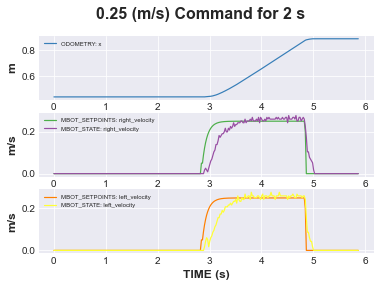

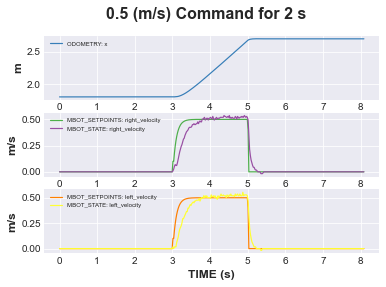

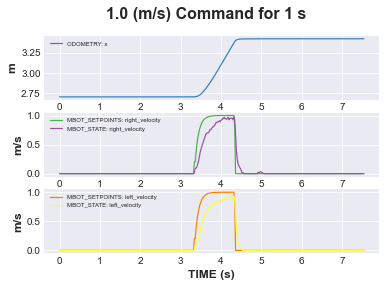

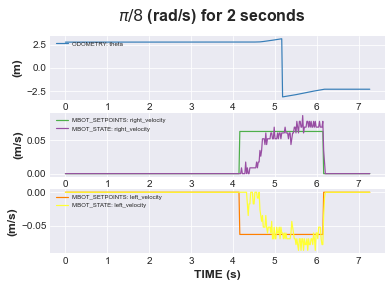

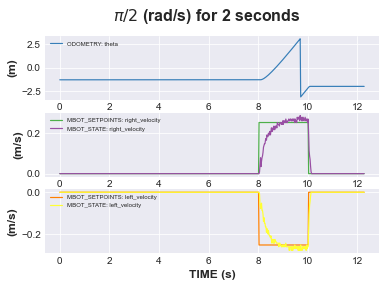

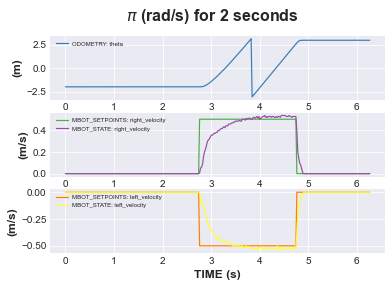

In [8]:
# set run type and run number
runtypes = ['straight', 'turn']
plotInfos = [plotInfo1, plotInfo2]
runs = [0, 1, 2]

# number of rows
rows = 3
# go through each runtype and match plot values
for runtype, plotInfo in zip(runtypes, plotInfos):
    # go through each run
    for run in runs:
        # get df for runtype and run combo
        df = payload[runtype]['df'][run]
        # overall labels
        xlabel = payload[runtype]['x']
        title = payload[runtype]['titles'][run]
        # get figure 
        app_utils.get_plot(df, plotInfo, title, xlabel, rows)


In [ ]:
payload['']